# Task 2
_____


# Import Necessary Libraries

In [5]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns


# Convert reviews into a DataFrame

In [6]:
df = pd.DataFrame(reviews, columns=["review_text"])

# Data Cleaning And Preparation

In [7]:
# Remove Duplicates And missing values 

df.drop_duplicates(subset=["review_text"], inplace=True)

df.dropna(subset=["review_text"],inplace=True)

# Standardize text: Lowercasing, Removing Punctuation And Stopwords

In [8]:
def Clean_review(review):
    review = review.lower() # For lowercase
    review = re.sub(r'[^\w\s]', '', review) # Remove Punctuation
    return review 

df["cleaned_review"] = df["review_text"].apply(Clean_review)

# Data Analysis


# Sentiment Analysis Using TexBlob


In [9]:
def get_sentiment(review):
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity
    return sentiment

df["sentiment"] = df["cleaned_review"].apply(get_sentiment)
df["sentiment_label"] = df["sentiment"].apply(lambda x: "positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))



# Topic Modeling Using LDA 

In [10]:
vectorizer = TfidfVectorizer(stop_words = "english")
X = vectorizer.fit_transform(df["cleaned_review"])

lda = LatentDirichletAllocation(n_components = 5, random_state = 42)
lda.fit(X)



LatentDirichletAllocation(n_components=5, random_state=42)

# Extract Top Words Per Topic


In [11]:
n_words = 10
words = vectorizer.get_feature_names_out()
topics = []


for topic_idx, topic in enumerate(lda.components_):
    topic_words = [words[i]for i in topic.argsort()[:-n_words -1:-1]]
    topics.append(" ".join(topic_words))
     

# Visualization


# Plot The Sentiment Distribution Bar Chart With Percentages

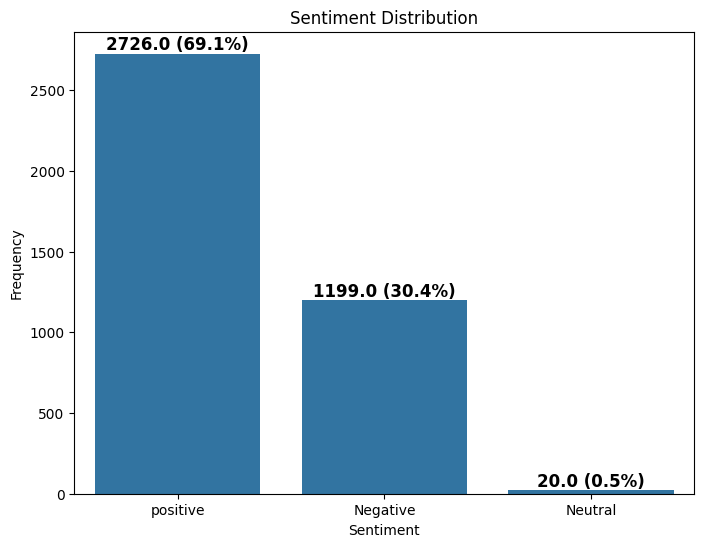

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="sentiment_label", data=df)

# Calculate total reviews
total_reviews = len(df)

# Annotate bars with counts and percentages
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_reviews) * 100
    ax.annotate(f'{height} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Set titles and labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

# Display the plot
plt.show()


# Word CLoud Of Most Common Words


<function matplotlib.pyplot.show(close=None, block=None)>

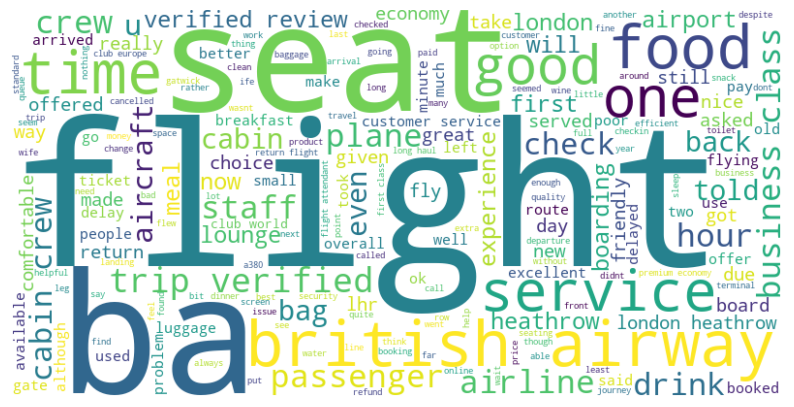

In [13]:
WordCloud = WordCloud(width = 800, height = 400, background_color = "white").generate(" ".join(df["cleaned_review"]))
plt.figure(figsize=(10,8))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show

# Topic Modeling Results


In [25]:
# Compute topic counts
topic_counts = [df["cleaned_review"].apply(lambda x: 1 if words in x else 0).sum() for words in topics]

In [27]:
print(df['cleaned_review'].head())
print(topics)


0     trip verified    mumbai check in is not so he...
1     trip verified    ba first lounge at t5 very b...
2     trip verified    terrible experience no respe...
3     trip verified  i know ba often comes under cr...
4     trip verified     my recent experience with b...
Name: cleaned_review, dtype: object
['martini kosher eze unsolicited marrakesh grandfather amslcy businness frontsection locations', 'economical lhrbgo catania murcia lux 173 sardinia jakarta islamabad bolt', 'tel aviv bari refunding redeem george arbitrary cello kansas b763', 'flight ba service seat good food crew british airways seats', 'zagreb lpt aud cleanest ba035 bike bark ai 317 lodging']
